### Libraries

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

### Importing the Crime Data

In [2]:
data = pd.read_csv('Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv')

### Settings

In [3]:
# Set ipython's max row display
pd.set_option('display.max_row', 1000)

# Set iPython's max column width to 50
pd.set_option('display.max_columns', 35)

# Seaborn style
sns.set_theme(style="whitegrid")

### Creating Year Column

In [4]:
data['Year'] = data['Date'].str.strip().str[-4:]
data = data.drop(data[data['Year'] == '2018'].index)

### Creating the Specific Hour for a Specific Crime Dataset

In [5]:
hour_data = data[['Category', 'Year', 'Date', 'Time']]
hour_data = hour_data[hour_data['Category'] == 'VEHICLE THEFT']
hour_data = hour_data[hour_data['Date'].str[:2].isin(['05','06','07','08'])]
hour_data = hour_data[hour_data['Time'].str[:2] == '02']
hour_data.sort_values('Time', inplace=True)
hour_data = hour_data.reset_index(drop = True)
hour_data['Minutes'] = hour_data['Time'].str[3:].astype(int)

### Plotting the Jitter Plot

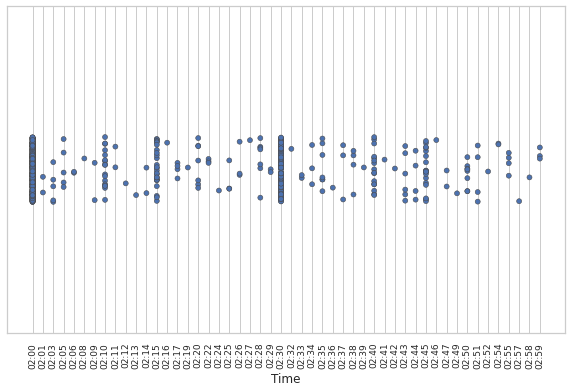

In [6]:
fig, axes = plt.subplots(figsize=(10,6))

sns.stripplot(x="Time", data=hour_data, linewidth=0.55, dodge=True, marker="o", ax=axes)

plt.xticks(rotation = 90, fontsize = 9)
plt.show()

### Check Geographical Patterns

In [7]:
pd.DataFrame(data.groupby(["Category"])["Y"].mean())

,Y
Category,
ARSON,37.757328
ASSAULT,37.766212
BAD CHECKS,37.769004
BRIBERY,37.755250
BURGLARY,37.768580
DISORDERLY CONDUCT,37.782379
DRIVING UNDER THE INFLUENCE,37.765705
DRUG/NARCOTIC,37.774279
DRUNKENNESS,37.770658


### Create the Geographical DataFrames

In [8]:
geo_data = data[['Category', 'Year', 'Date', 'X', 'Y']]
geo_data = geo_data[geo_data['Year'].astype(int) < 2010]
crime1 = geo_data[geo_data['Category'] == 'DISORDERLY CONDUCT']
crime2 = geo_data[geo_data['Category'] == 'WEAPON LAWS']
crime1 = crime1[crime1['Y'] < 40]
crime2 = crime2[crime2['Y'] < 40]
crime1 = crime1.reset_index(drop = True)
crime2 = crime2.reset_index(drop = True)

### Geographical Histograms

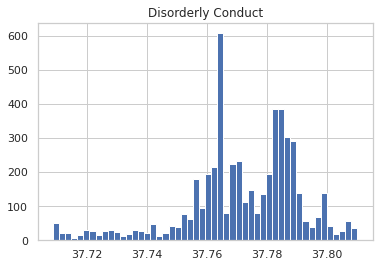

In [9]:
plt.hist(crime1['Y'], bins=50)
plt.title('Disorderly Conduct')

plt.show()

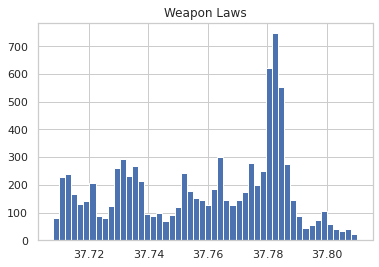

In [10]:
plt.hist(crime2['Y'], bins=50)
plt.title('Weapon Laws')

plt.show()

### Kernel Density Plot

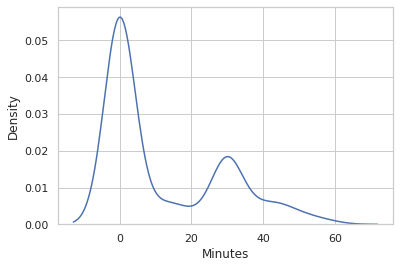

In [11]:
sns.kdeplot(x = hour_data['Minutes'])

plt.show()

### Random Kernel Density Plots

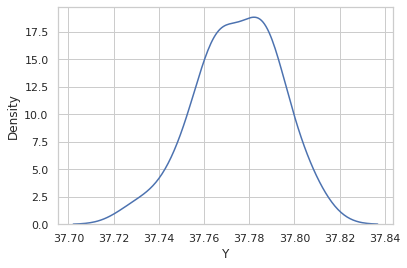

In [12]:
sns.kdeplot(x = crime1.sample(25)['Y'])

plt.show()

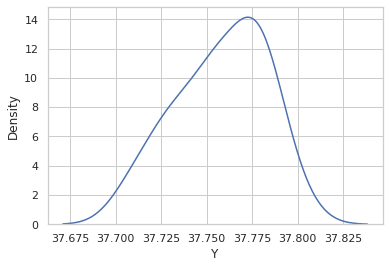

In [13]:
sns.kdeplot(x = crime2.sample(25)['Y'])

plt.show()

### Probability Plots

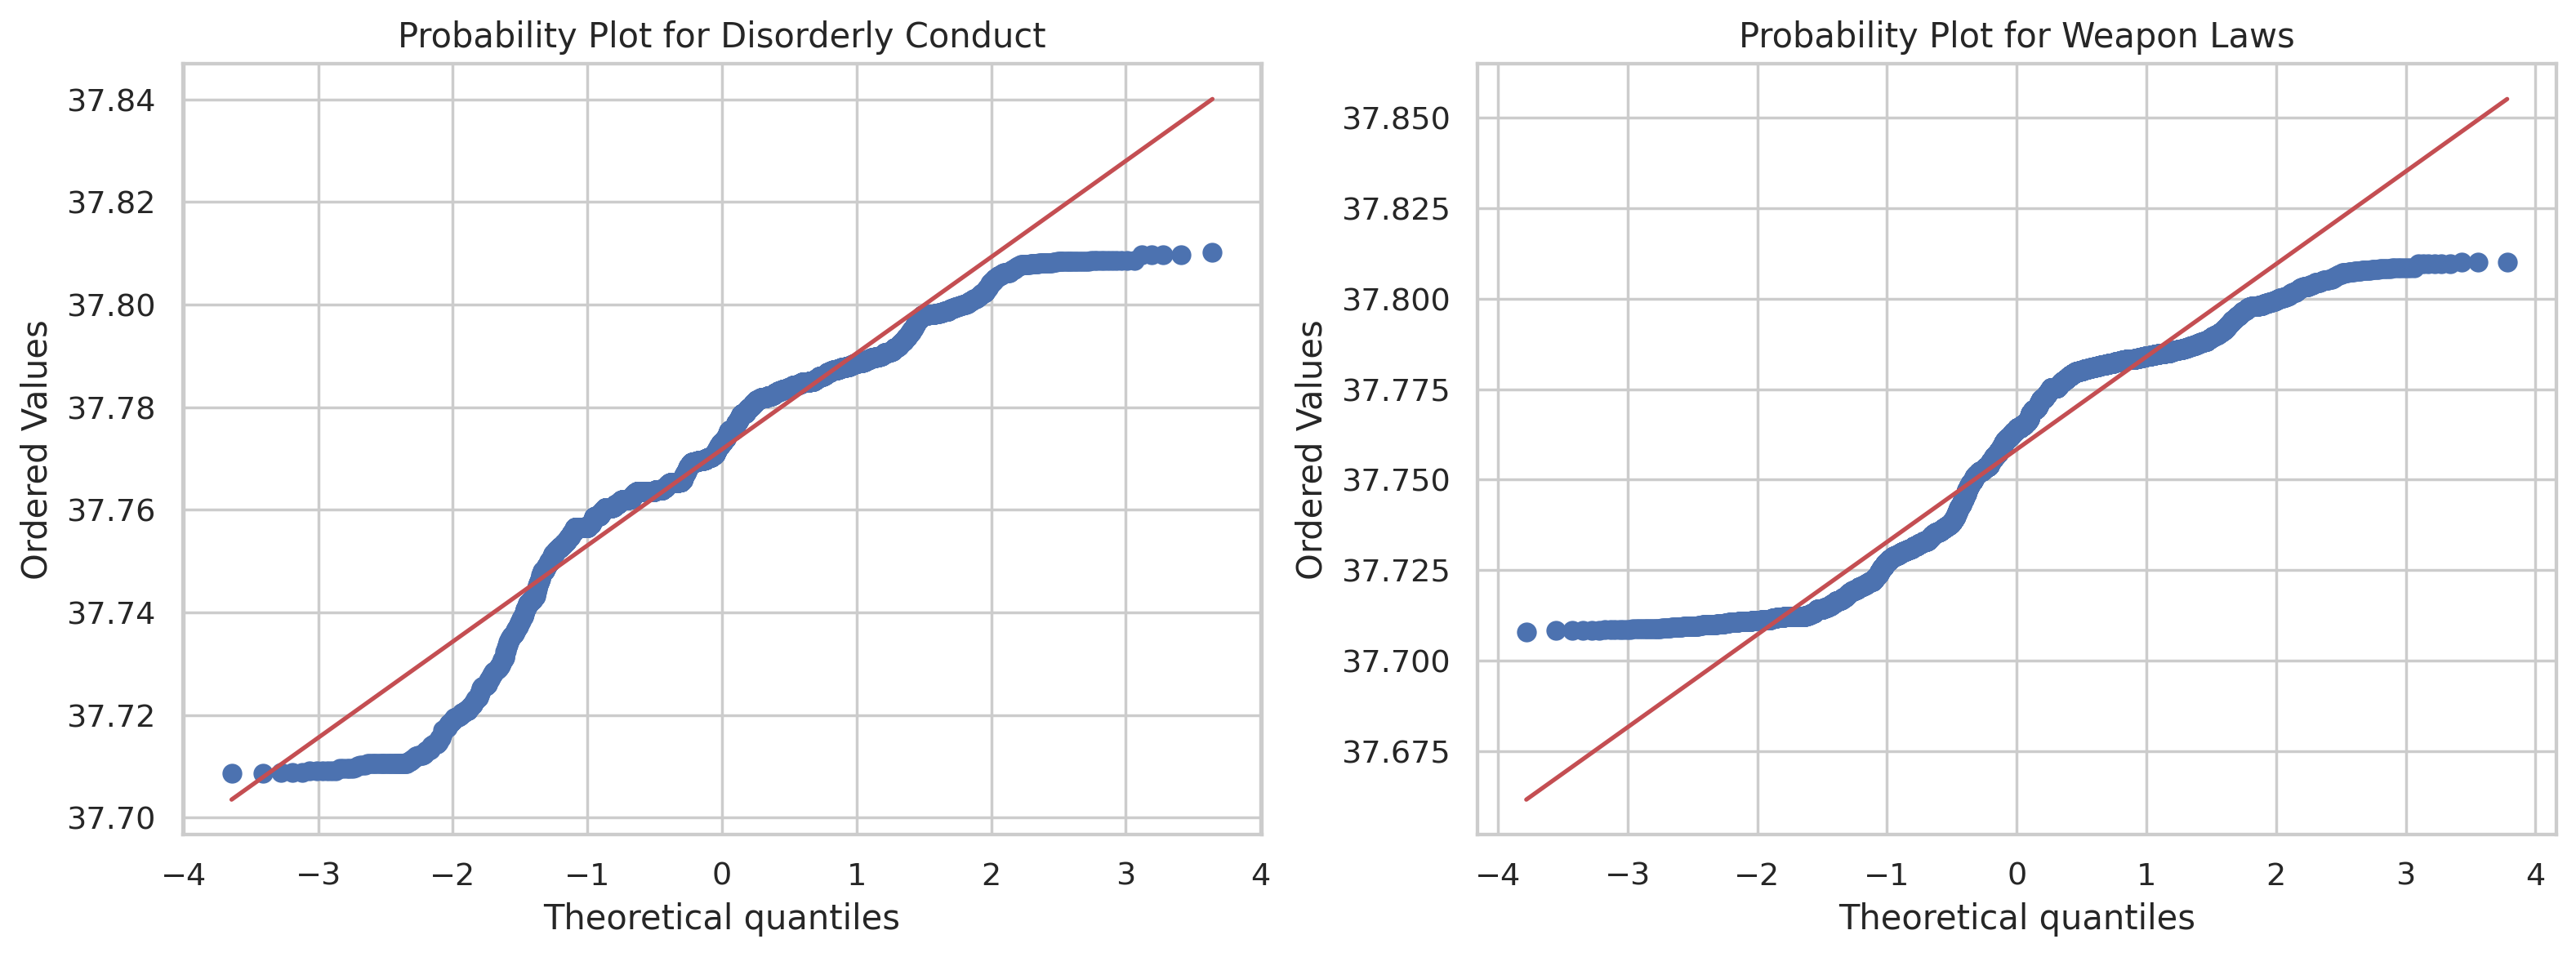

In [14]:
fig, ax = plt.subplots(ncols=2, figsize=(15, 5), dpi=250)

stats.probplot(crime1['Y'], plot=ax[0])
ax[0].set_title("Probability Plot for Disorderly Conduct")

stats.probplot(crime2['Y'], plot=ax[1])
ax[1].set_title("Probability Plot for Weapon Laws")

plt.show()

### Focus Crimes

In [15]:
focus_crimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

focus_data = data[['Category', 'Date', 'Time']]
focus_data = focus_data[focus_data['Category'].isin(focus_crimes)].reset_index(drop=True)

### Box Plots (Daily Arrests)

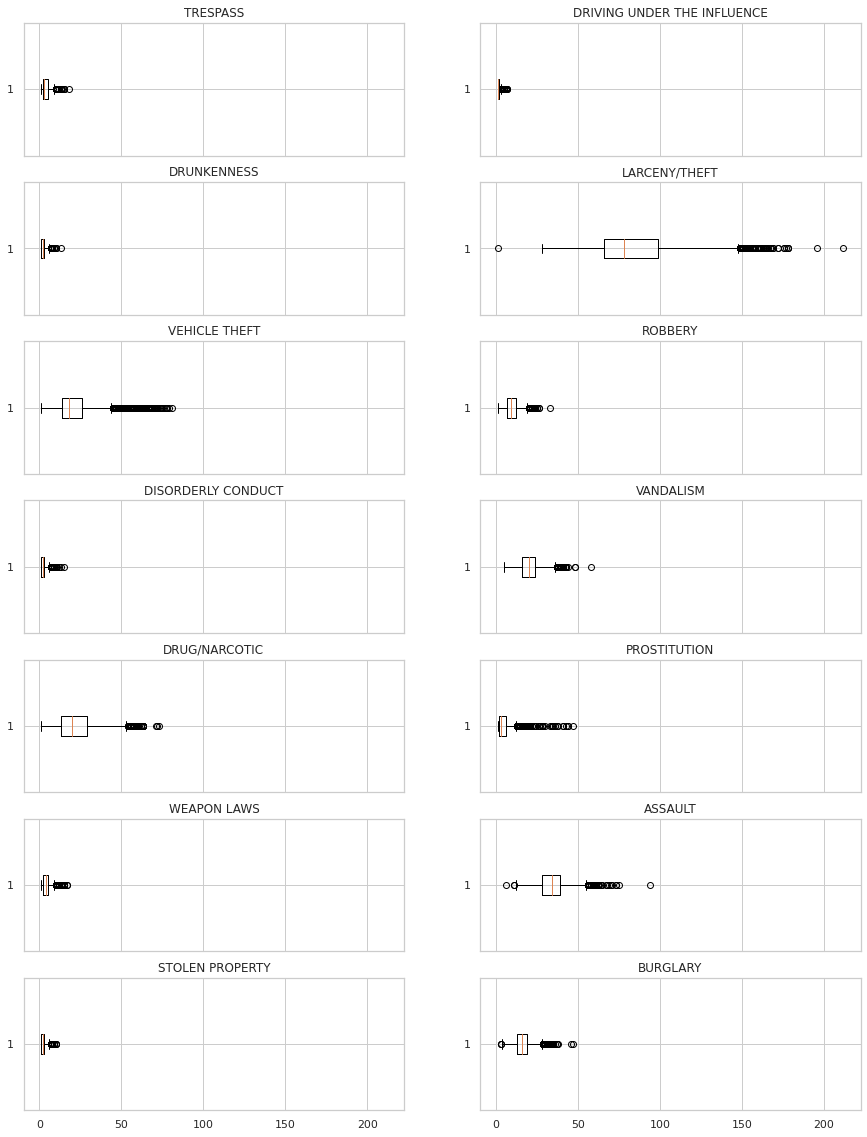

In [16]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15,20), sharex=True)

for i, crime in enumerate(focus_crimes):
    crime_data = focus_data[['Category', 'Date']]
    crime_data = crime_data[crime_data['Category'] == crime].groupby(['Date']).agg(['count']).values
    axes[i//2][i%2].boxplot(crime_data, vert=False)
    axes[i//2][i%2].set_title(crime)

The boxplots reveal how our data is spreaded. There is a daily number of arrests and with these visualizations it is easy to understand the number of daily arrests and if they differ from day to day.

### Box Plots (Hourly Distribution)

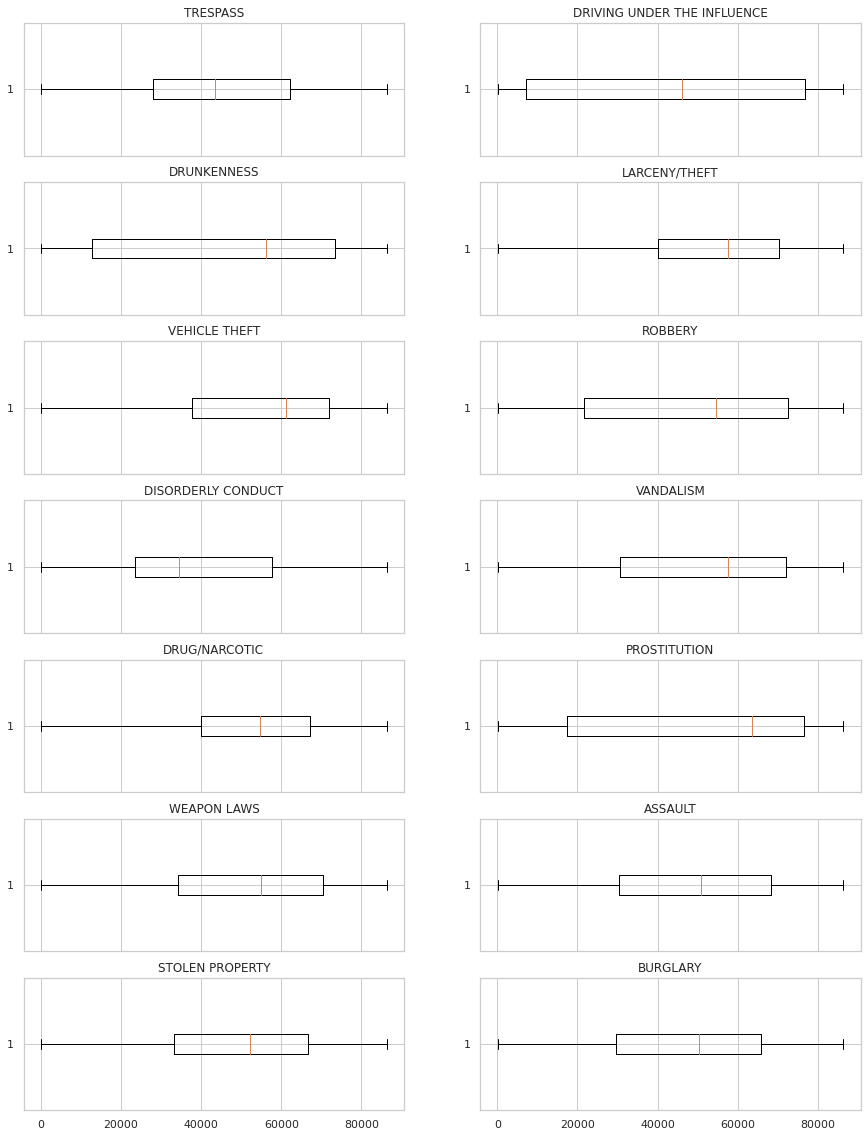

In [17]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15,20), sharex=True)

for i, crime in enumerate(focus_crimes):
    crime_data = focus_data[['Category', 'Time']][focus_data['Category'] == crime]
    crime_data['Seconds'] = crime_data['Time'].str.split(":").apply(lambda seconds: int(seconds[0]) * 3600 + int(seconds[1]) * 60)
    sec = crime_data['Seconds'].values
    axes[i//2][i%2].boxplot(sec, vert=False)
    axes[i//2][i%2].set_title(crime)